# Libraries used

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Data (Importing and Cleaning)

In [128]:
# Read the CSV file containing loan approval data into a pandas DataFrame
# The file must be present in the working directory
data = pd.read_csv("loan_approval_data.csv")

# Display the first 5 rows of the dataset
# Useful for a quick preview of features and values
data.head()

# Display concise information about the DataFrame
# Includes number of rows, column names, data types, and non-null counts
data.info()

# Check for missing (null) values in each column
# Helps identify columns that may require data cleaning or imputation
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [129]:
# Identify categorical columns in the dataset
# Columns with data type 'object' typically represent categorical features
categorical_cols = data.select_dtypes(include=["object"]).columns

# Identify numerical columns in the dataset
# Columns with data type 'float64' typically represent continuous numerical features
numerical_cols = data.select_dtypes(include=["float64"]).columns


In [130]:
# Create an imputer for numerical columns
# Missing values are replaced with the mean of each column
num_imp = SimpleImputer(strategy="mean")
data[numerical_cols] = num_imp.fit_transform(data[numerical_cols])

# Create an imputer for categorical columns
# Missing values are replaced with the most frequent (mode) value of each column
cat_imp = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = cat_imp.fit_transform(data[categorical_cols])

# Verify that all missing values have been handled
# Returns the count of null values remaining in each column
data.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA - Exploratory Data Analysis

Text(0.5, 1.0, 'Is Loan Approved or Not')

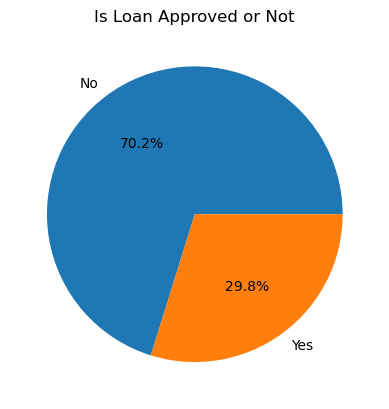

In [131]:
# Count the number of samples in each class of the target variable
# 'Loan_Approved' typically contains binary values (e.g., 0 = No, 1 = Yes)
classes_count = data["Loan_Approved"].value_counts()

# Plot a pie chart to visualize class distribution
# labels represent loan approval status
# autopct displays percentage values on the chart
plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")

# Add a title to the plot
plt.title("Is Loan Approved or Not")


Text(0, 0.5, 'Count')

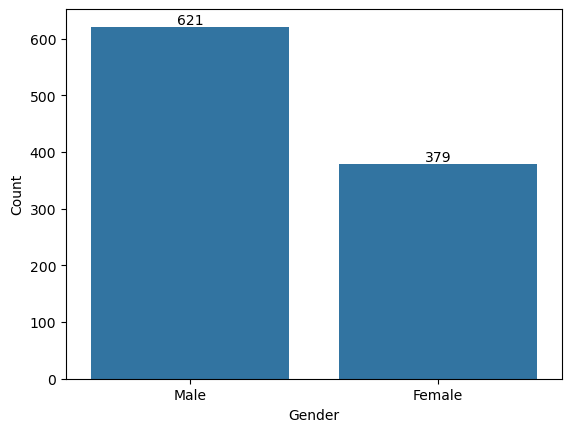

In [132]:
# Count the number of occurrences of each gender category
gender_count = data["Gender"].value_counts()

# Create a bar plot to visualize gender distribution
ax = sns.barplot(x=gender_count.index, y=gender_count.values)

# Add value labels on top of each bar
ax.bar_label(ax.containers[0])

# Add axis labels for better clarity
ax.set_xlabel("Gender")
ax.set_ylabel("Count")


Text(0.5, 1.0, 'Distribution of Applicant Income')

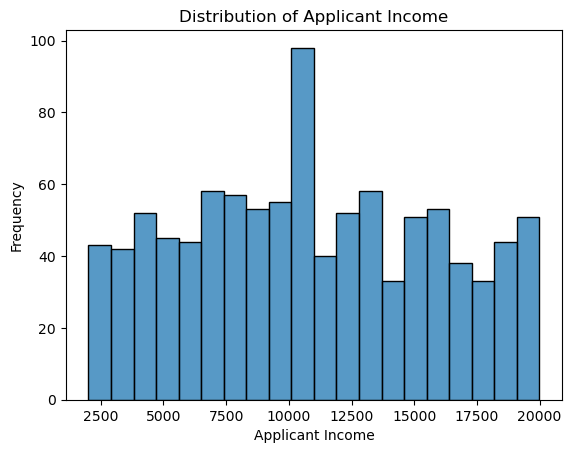

In [133]:
# Plot a histogram to visualize the distribution of applicant income
# 'bins' controls the number of intervals used to group the data
sns.histplot(
    data=data,
    x="Applicant_Income",
    bins=20
)

# Add axis labels and title for clarity
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Distribution of Applicant Income")


Text(0.5, 1.0, 'Distribution of Coapplicant Income')

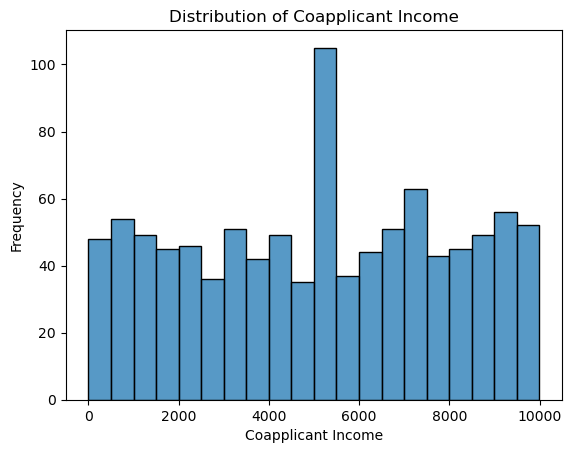

In [134]:
# Plot a histogram to visualize the distribution of co-applicant income
# 'bins' determines the number of intervals used to group income values
sns.histplot(
    data=data,
    x="Coapplicant_Income",
    bins=20
)

# Add axis labels and title for better interpretation
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.title("Distribution of Coapplicant Income")


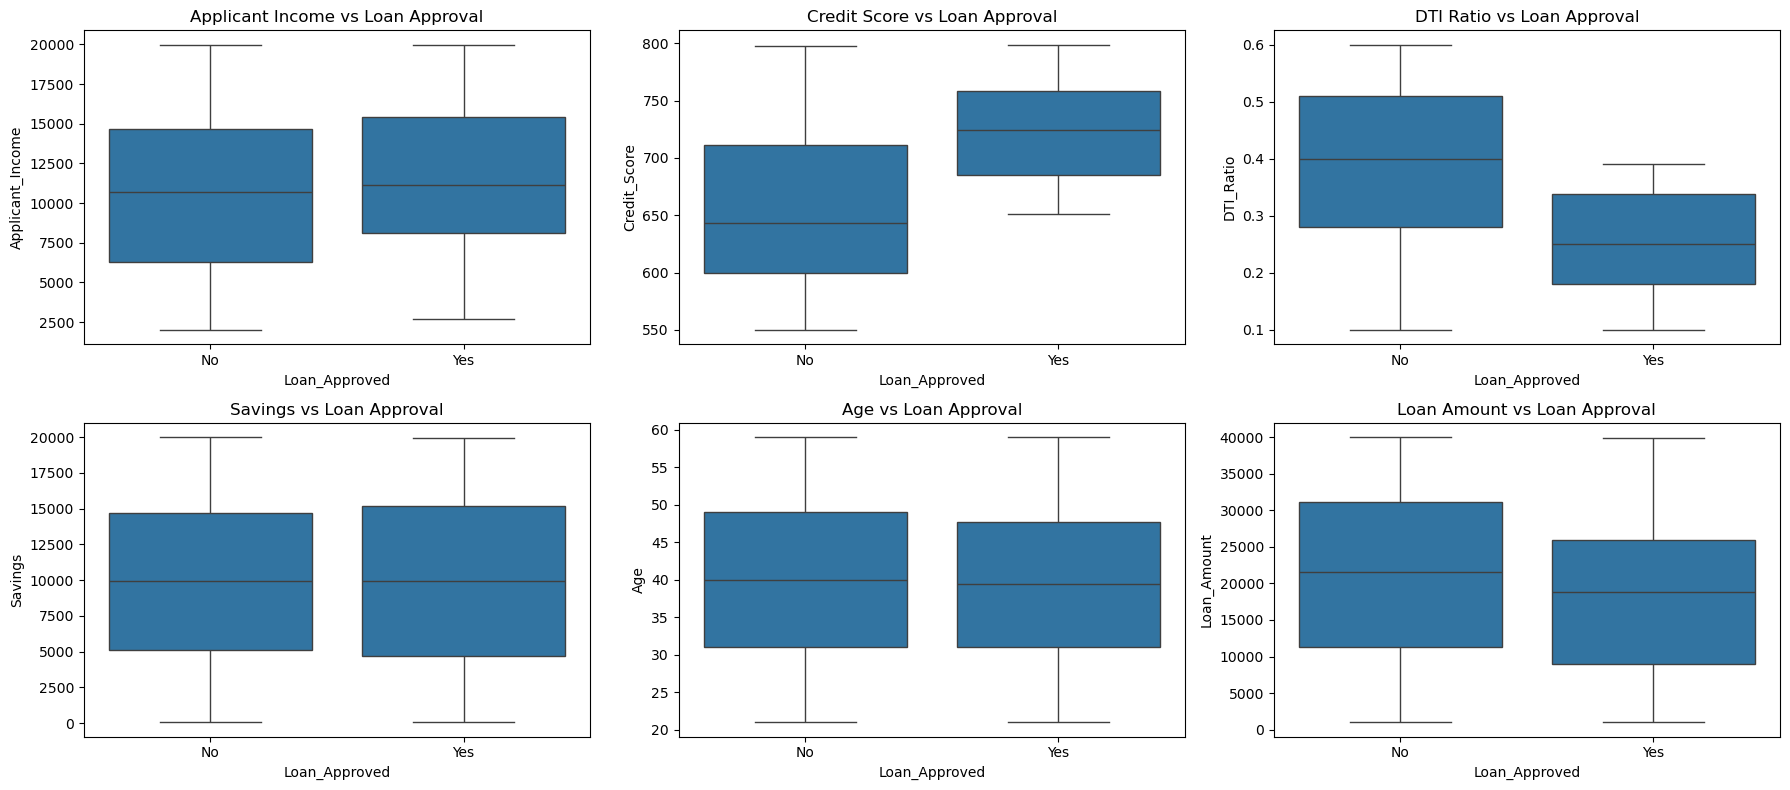

In [135]:
# Create a 2x3 grid of subplots to visualize multiple features
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Box plot: Applicant Income vs Loan Approval
sns.boxplot(
    ax=axes[0, 0],
    data=data,
    x="Loan_Approved",
    y="Applicant_Income"
)
axes[0, 0].set_title("Applicant Income vs Loan Approval")

# Box plot: Credit Score vs Loan Approval
sns.boxplot(
    ax=axes[0, 1],
    data=data,
    x="Loan_Approved",
    y="Credit_Score"
)
axes[0, 1].set_title("Credit Score vs Loan Approval")

# Box plot: DTI Ratio vs Loan Approval
sns.boxplot(
    ax=axes[0, 2],
    data=data,
    x="Loan_Approved",
    y="DTI_Ratio"
)
axes[0, 2].set_title("DTI Ratio vs Loan Approval")

# Box plot: Savings vs Loan Approval
sns.boxplot(
    ax=axes[1, 0],
    data=data,
    x="Loan_Approved",
    y="Savings"
)
axes[1, 0].set_title("Savings vs Loan Approval")

# Box plot: Age vs Loan Approval
sns.boxplot(
    ax=axes[1, 1],
    data=data,
    x="Loan_Approved",
    y="Age"
)
axes[1, 1].set_title("Age vs Loan Approval")

# Box plot: Loan Amount vs Loan Approval
sns.boxplot(
    ax=axes[1, 2],
    data=data,
    x="Loan_Approved",
    y="Loan_Amount"
)
axes[1, 2].set_title("Loan Amount vs Loan Approval")

# Adjust layout to prevent overlapping of plots
plt.tight_layout()


Text(0.5, 1.0, 'Credit Score Distribution by Loan Approval Status')

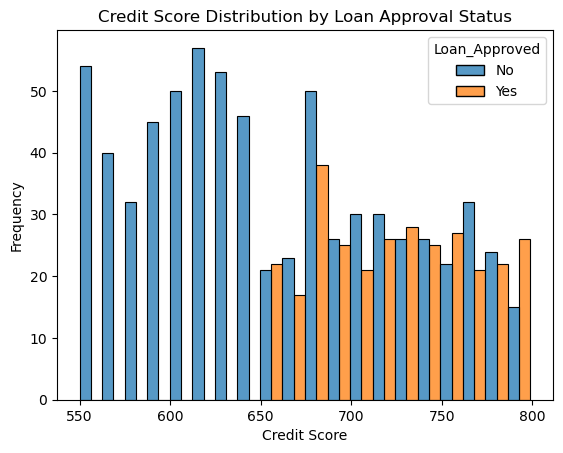

In [136]:
# Plot a histogram to visualize the distribution of credit scores
# Colored by loan approval status to compare both classes
# 'multiple="dodge"' places bars side-by-side for better comparison
sns.histplot(
    data=data,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

# Add axis labels and title for better interpretation
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Credit Score Distribution by Loan Approval Status")


In [137]:
# Removing Applicant Id because it does not provide any benefit to the data
data = data.drop("Applicant_ID",axis=1)

# Encoding

In [138]:
# Define categorical columns to be one-hot encoded
one_hot_cols = [
    "Employment_Status",
    "Marital_Status",
    "Loan_Purpose",
    "Property_Area",
    "Gender",
    "Employer_Category"
]

# Initialize LabelEncoder for ordinal/binary categorical variables
le = LabelEncoder()

# Encode Education_Level into numerical labels
data["Education_Level"] = le.fit_transform(data["Education_Level"])

# Encode target variable Loan_Approved into numerical labels
data["Loan_Approved"] = le.fit_transform(data["Loan_Approved"])

# Initialize OneHotEncoder
# drop="first" avoids the dummy variable trap
# sparse_output=False returns a dense NumPy array
# handle_unknown="ignore" prevents errors with unseen categories
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Apply one-hot encoding to selected categorical columns
encoded = ohe.fit_transform(data[one_hot_cols])

# Convert encoded array to a DataFrame with meaningful column names
encoded_data = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(one_hot_cols),
    index=data.index
)

# Combine original numerical/label-encoded columns with one-hot encoded columns
final_data = pd.concat(
    [data.drop(columns=one_hot_cols), encoded_data],
    axis=1
)

# Display the first few rows of the final processed dataset
final_data.head()

# Display concise information about the DataFrame
# Includes number of rows, column names, data types, and non-null counts
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

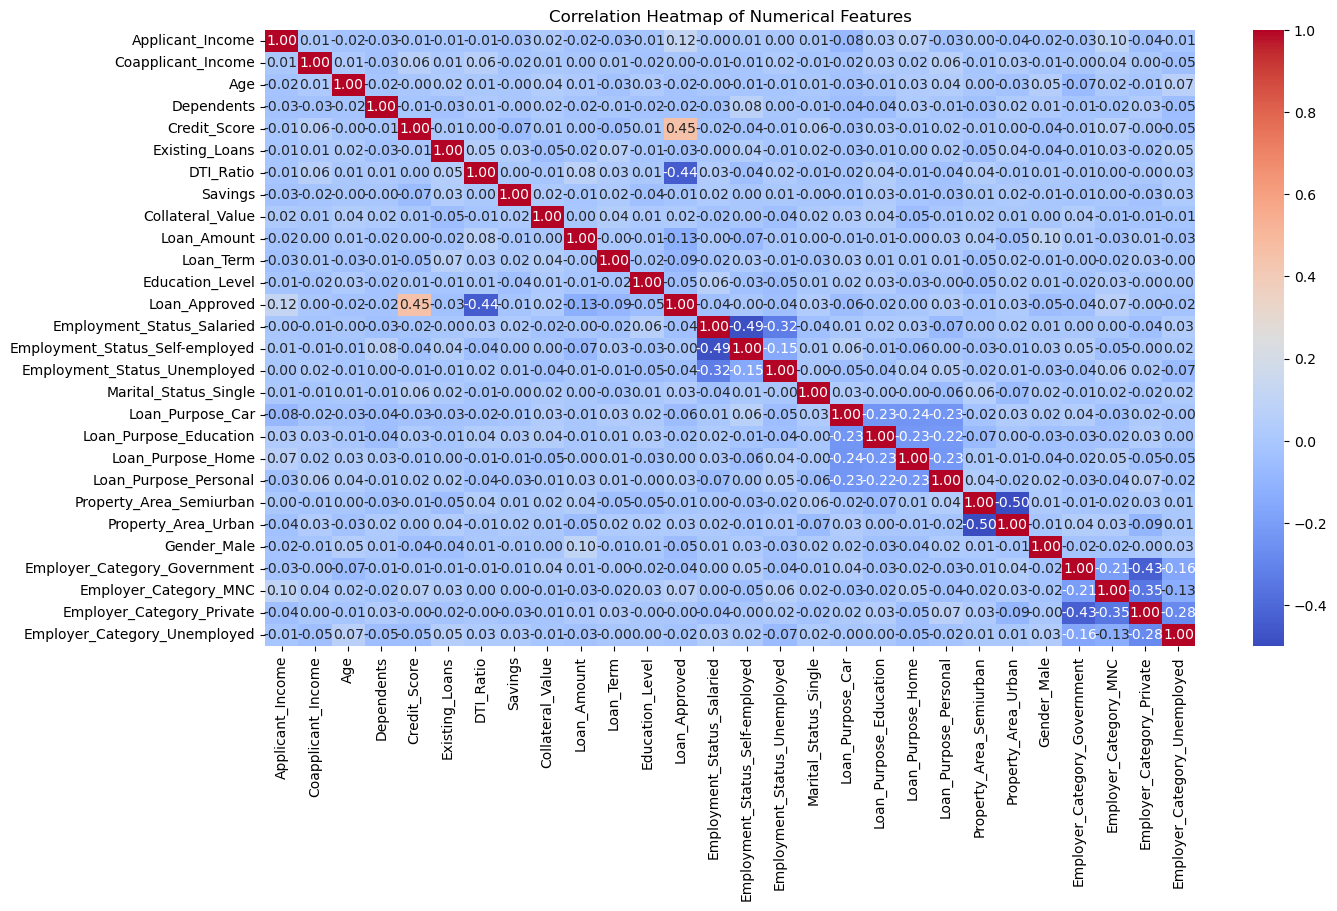

In [139]:
# Select only numerical columns from the final dataset
# Correlation can be computed only on numeric features
num_cols = final_data.select_dtypes(include="number")

# Compute the correlation matrix
# Shows the linear relationship between numerical features
corr_matrix = num_cols.corr()

# Create a figure for better visualization
plt.figure(figsize=(15, 8))

# Plot the correlation heatmap
# annot=True displays correlation values
# fmt=".2f" formats values to two decimal places
# cmap="coolwarm" highlights positive and negative correlations
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Add a title for clarity
plt.title("Correlation Heatmap of Numerical Features")


# Train-Test-Split + Feature Scaling


In [140]:
# Separate features (X) and target variable (Y)
# 'Loan_Approved' is the target column
X = final_data.drop("Loan_Approved", axis=1)
Y = final_data["Loan_Approved"]

# Split the dataset into training and testing sets
# test_size=0.2 allocates 20% of the data for testing
# random_state ensures reproducibility of results
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [141]:
# Initialize the StandardScaler
# This scales features to have mean = 0 and standard deviation = 1
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# Fitting only on training data prevents data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling parameters to the test data
X_test_scaled = scaler.transform(X_test)


# Training & Evaluating Models

In [142]:
# Initialize the Logistic Regression model
# Logistic Regression is used for binary classification problems
log_model = LogisticRegression()

# Train the model using the scaled training data
log_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = log_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Model")

# Precision: proportion of correctly predicted positive observations
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positives correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall correctness of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: detailed breakdown of prediction results
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Logistic Regression Model
Precision :  78.33333333333333 %
Recall    :  77.04918032786885 %
F1 Score  :  77.68595041322314 %
Accuracy  :  86.5 %
Confusion Matrix:
 [[126  13]
 [ 14  47]]


In [143]:
# Initialize the K-Nearest Neighbors (KNN) model
# n_neighbors defines the number of nearest neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the scaled training data
knn_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = knn_model.predict(X_test_scaled)

# Model Evaluation
print("KNN Model")

# Precision: proportion of correctly predicted positive samples
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positive samples correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall performance of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: shows true vs predicted class distribution
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


KNN Model
Precision :  62.745098039215684 %
Recall    :  52.459016393442624 %
F1 Score  :  57.14285714285714 %
Accuracy  :  76.0 %
Confusion Matrix:
 [[120  19]
 [ 29  32]]


In [144]:
# Initialize the Gaussian Naive Bayes model
# Suitable for continuous features assuming normal distribution
nb_model = GaussianNB()

# Train the Naive Bayes model using the scaled training data
nb_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = nb_model.predict(X_test_scaled)

# Model Evaluation
print("Naive Bayes Model")

# Precision: proportion of correctly predicted positive samples
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positive samples correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall performance of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: shows true vs predicted class distribution
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Naive Bayes Model
Precision :  80.35714285714286 %
Recall    :  73.77049180327869 %
F1 Score  :  76.92307692307693 %
Accuracy  :  86.5 %
Confusion Matrix:
 [[128  11]
 [ 16  45]]


# We Found the best model till now on the basis of precision is  Naive Bayes

# Feature Engineering

In [145]:
# Feature Engineering
# Create squared terms to capture non-linear relationships
final_data["DTI_Ratio_sq"] = final_data["DTI_Ratio"] ** 2
final_data["Credit_Score_sq"] = final_data["Credit_Score"] ** 2

# Separate features (X) and target variable (Y)
# Drop original features that were transformed to avoid multicollinearity
X = final_data.drop(
    columns=["Loan_Approved", "DTI_Ratio", "Credit_Score"]
)
Y = final_data["Loan_Approved"]

# Split the dataset into training and testing sets
# 20% of the data is reserved for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
# Standardizes features to zero mean and unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# Prevents data leakage from the test set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

# Preview the training feature set
X_train.head()


,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [146]:
# Initialize the Logistic Regression model
# Logistic Regression is used for binary classification problems
log_model = LogisticRegression()

# Train the model using the scaled training data
log_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = log_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Model")

# Precision: proportion of correctly predicted positive observations
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positives correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall correctness of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: detailed breakdown of prediction results
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Logistic Regression Model
Precision :  79.03225806451613 %
Recall    :  80.32786885245902 %
F1 Score  :  79.67479674796748 %
Accuracy  :  87.5 %
Confusion Matrix:
 [[126  13]
 [ 12  49]]


In [147]:
# Initialize the K-Nearest Neighbors (KNN) model
# n_neighbors defines the number of nearest neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the scaled training data
knn_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = knn_model.predict(X_test_scaled)

# Model Evaluation
print("KNN Model")

# Precision: proportion of correctly predicted positive samples
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positive samples correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall performance of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: shows true vs predicted class distribution
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


KNN Model
Precision :  62.0 %
Recall    :  50.81967213114754 %
F1 Score  :  55.85585585585585 %
Accuracy  :  75.5 %
Confusion Matrix:
 [[120  19]
 [ 30  31]]


In [148]:
# Initialize the Gaussian Naive Bayes model
# Suitable for continuous features assuming normal distribution
nb_model = GaussianNB()

# Train the Naive Bayes model using the scaled training data
nb_model.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
Y_pred = nb_model.predict(X_test_scaled)

# Model Evaluation
print("Naive Bayes Model")

# Precision: proportion of correctly predicted positive samples
print("Precision : ", precision_score(Y_test, Y_pred) * 100, "%")

# Recall: proportion of actual positive samples correctly identified
print("Recall    : ", recall_score(Y_test, Y_pred) * 100, "%")

# F1 Score: harmonic mean of precision and recall
print("F1 Score  : ", f1_score(Y_test, Y_pred) * 100, "%")

# Accuracy: overall performance of the model
print("Accuracy  : ", accuracy_score(Y_test, Y_pred) * 100, "%")

# Confusion Matrix: shows true vs predicted class distribution
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Naive Bayes Model
Precision :  78.33333333333333 %
Recall    :  77.04918032786885 %
F1 Score  :  77.68595041322314 %
Accuracy  :  86.5 %
Confusion Matrix:
 [[126  13]
 [ 14  47]]


# The Ranking of Models on the basis of Precision is as follow:

# 1. Naive Bayes
# 2. Logistic Regression
# 3. KNN
